In [5]:
# Sakshi Manohar Kasar
# COBA104

# Importing Necesarry Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.datasets import load_boston
from sklearn.datasets import fetch_california_housing    #Alternative of load bosten
housing = fetch_california_housing()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import keras
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential
import warnings
warnings.filterwarnings("ignore") 

In [6]:
# Loading Data
housing = fetch_california_housing()
data = pd.DataFrame(housing.data)
data.columns = housing.feature_names
data['PRICE'] = housing.target 
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
# Data Exploration
print(data.shape)
print(data.dtypes)
print(data.isnull().sum())
print(data.describe())

(20640, 9)
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
PRICE         float64
dtype: object
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   172

<Axes: >

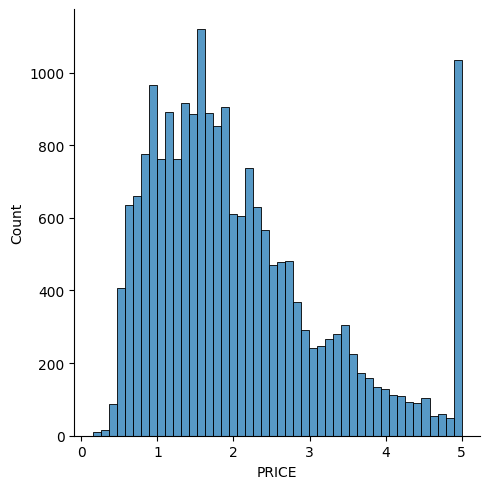

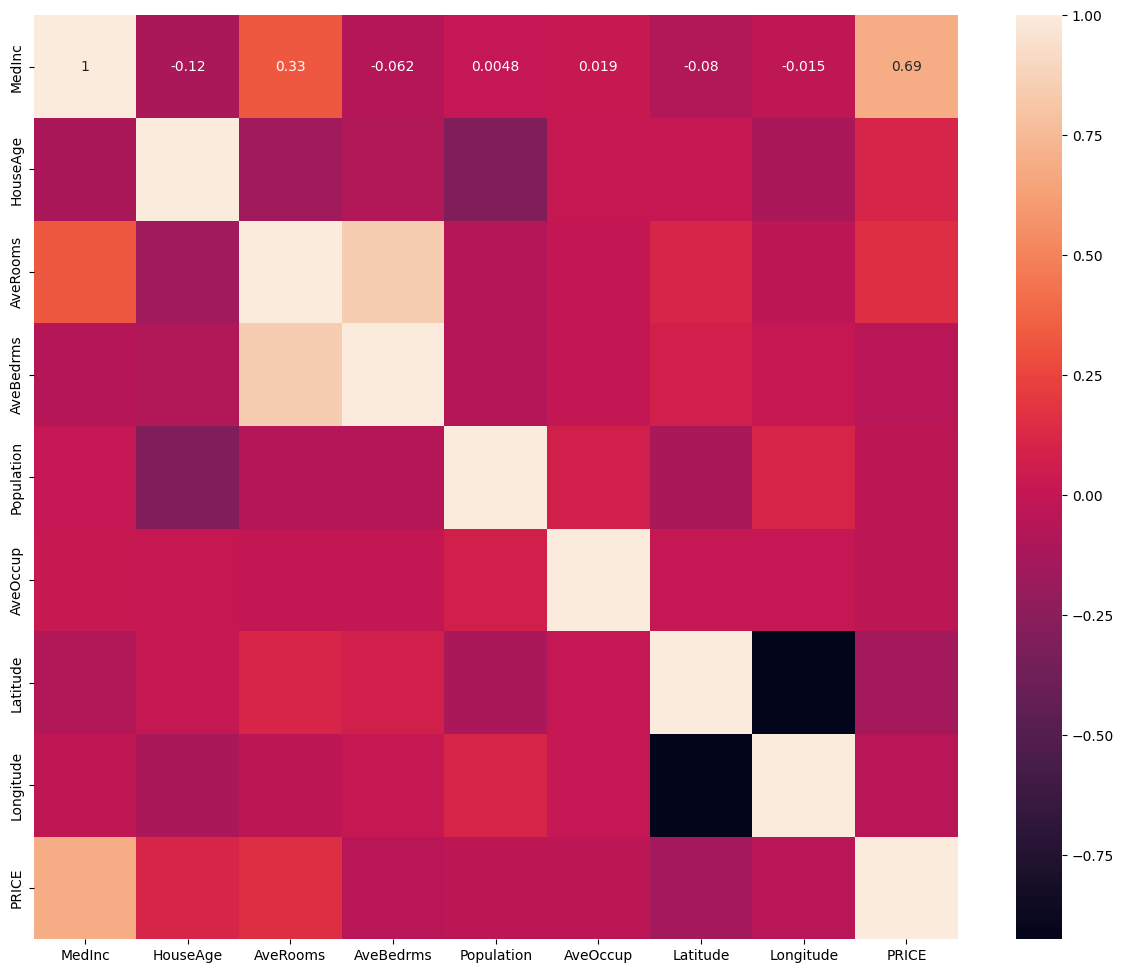

In [8]:
# Data Visualization
sns.displot(data.PRICE)

correlation = data.corr()
correlation.loc['PRICE']

fig,axes = plt.subplots(figsize=(15,12))
sns.heatmap(correlation,square = True,annot = True)

In [9]:
# Splitting Data into testing and training data
X = data.iloc[:,:-1]
y= data.PRICE
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

# Normalizing the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
# Model Building
model = Sequential()
model.add(Dense(128,activation  = 'relu',input_dim =8))  #input_dim was 13 previously but because of change in files(boston to calfornia) its changedto 8
model.add(Dense(64,activation  = 'relu'))     #shape of your input data (X_train) matches the input shape expected by your model
model.add(Dense(32,activation  = 'relu'))
model.add(Dense(16,activation  = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1152      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12033 (47.00 KB)
Trainable params: 12033 (47.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Fitting the data to the model
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
516/516 [==============================] - 3s 3ms/step - loss: 0.6545
Epoch 2/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3661
Epoch 3/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3365
Epoch 4/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3186
Epoch 5/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3109
Epoch 6/100
516/516 [==============================] - 1s 2ms/step - loss: 0.2978
Epoch 7/100
516/516 [==============================] - 1s 2ms/step - loss: 0.2924
Epoch 8/100
516/516 [==============================] - 1s 2ms/step - loss: 0.2900
Epoch 9/100
516/516 [==============================] - 1s 2ms/step - loss: 0.2836
Epoch 10/100
516/516 [==============================] - 1s 2ms/step - loss: 0.2778
Epoch 11/100
516/516 [==============================] - 1s 2ms/step - loss: 0.2756
Epoch 12/100
516/516 [==============================] - 1s 2ms/step - loss: 0.2734
Epoch 13/100


In [12]:
print(X_train.shape)   #inspect the shapes of X_train and y_train
print(y_train.shape)

(16512, 8)
(16512,)


In [15]:
# Evaluating the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score = ", r2)
print("RMSE Score = ", rmse)

129/129 [==============================] - 0s 2ms/step
R2 Score =  0.7928661495324014
RMSE Score =  0.5190807465411702
